In [33]:
from google.colab import files

uploaded = files.upload()

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

# **Import Input Data**

In [171]:
df = pd.read_csv("/content/Suicides.csv")
df = df[df["Type_code"]=="Causes"]
#df= df[df["Gender"]=="Female"]
df.groupby('Type')['Total'].count()

Type
Bankruptcy or Sudden change in Economic           3850
Bankruptcy or Sudden change in Economic Status     350
Cancellation/Non-Settlement of Marriage           4200
Cancer                                            4200
Causes Not known                                  4200
Death of Dear Person                              4200
Divorce                                           4200
Dowry Dispute                                     4200
Drug Abuse/Addiction                              4200
Failure in Examination                            4200
Fall in Social Reputation                         4200
Family Problems                                   4200
Ideological Causes/Hero Worshipping               4200
Illegitimate Pregnancy                            4200
Illness (Aids/STD)                                4200
Insanity/Mental Illness                           4200
Love Affairs                                      4200
Not having Children (Barrenness/Impotency          350
Not h

# **Setting up PySpark in Google Colab**

In [172]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [173]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [5]:
!ls

drive  sample_data  spark-3.1.1-bin-hadoop3.2  spark-3.1.1-bin-hadoop3.2.tgz


In [174]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [175]:
spark_df = spark.read.csv("Suicides.csv", header =True, inferSchema=True)


In [176]:
spark_df.printSchema()

root
 |-- State: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Type_code: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age_group: string (nullable = true)
 |-- Total: integer (nullable = true)



In [177]:
spark_df.limit(5)

State,Year,Type_code,Type,Gender,Age_group,Total
A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
A & N Islands,2001,Causes,Bankruptcy or Sud...,Female,0-14,0
A & N Islands,2001,Causes,Cancellation/Non-...,Female,0-14,0
A & N Islands,2001,Causes,Physical Abuse (R...,Female,0-14,0
A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [178]:

spark_df.createOrReplaceTempView("suicide")


# **1)Most common suicide cause among females in India over the entire period 2001-2012**


In [186]:
spark.sql("select Type, count(Total) as count from suicide where Gender = 'Female' group by Type order by count desc")


Type,count
Others (Please Sp...,3512
Paralysis,2100
By Self Inflictio...,2100
Fall in Social Re...,2100
Self-employed (Bu...,2100
By touching elect...,2100
By Overdose of sl...,2100
Farming/Agricultu...,2100
Property Dispute,2100
Other Prolonged I...,2100


# **2)State wise most common cause among males over the entire period**

In [190]:
spark.sql("select State, Type, count(Total) as count from suicide where Gender = 'Male' group by State, Type order by count desc")

State,Type,count
Maharashtra,Others (Please Sp...,120
Andhra Pradesh,Others (Please Sp...,120
Chhattisgarh,Others (Please Sp...,120
Karnataka,Others (Please Sp...,120
Bihar,Others (Please Sp...,120
Haryana,Others (Please Sp...,120
Gujarat,Others (Please Sp...,120
Madhya Pradesh,Others (Please Sp...,120
Rajasthan,Others (Please Sp...,120
Jharkhand,Others (Please Sp...,119


# **3)Age group wise most common cause among males and females**

In [98]:
spark.sql("select Age_group, Type, Gender, count(Total) as count from suicide group by Age_group, Type, Gender order by count desc")

Age_group,Type,Gender,count
30-44,Others (Please Sp...,Male,788
15-29,Others (Please Sp...,Male,786
45-59,Others (Please Sp...,Male,772
15-29,Others (Please Sp...,Female,757
60+,Others (Please Sp...,Male,731
30-44,Others (Please Sp...,Female,725
45-59,Others (Please Sp...,Female,694
0-14,Others (Please Sp...,Male,674
0-14,Others (Please Sp...,Female,673
60+,Others (Please Sp...,Female,663


# **4)Total number of suicides per year per state**

In [99]:
spark.sql("select Year, State, count(Total) from suicide group by Year, State order by Year, State")

Year,State,count(Total)
2001,A & N Islands,562
2001,Andhra Pradesh,566
2001,Arunachal Pradesh,556
2001,Assam,565
2001,Bihar,566
2001,Chandigarh,562
2001,Chhattisgarh,565
2001,D & N Haveli,559
2001,Daman & Diu,557
2001,Delhi (Ut),566


# **5)Male suicide rate vs female suicide rate**

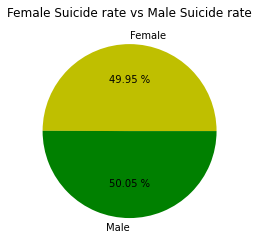

In [143]:
df = spark.sql("select * from suicide")
female = df[df['Gender']=="Female"].count()
male = df[df['Gender'] == "Male"].count()
labels=["Female", "Male"]

plt.title("Female Suicide rate vs Male Suicide rate")
plt.pie([female, male], labels= labels, colors = ['y','g'],autopct='%0.2f %%')
plt.show()

# **6)Which state has more suicides over the entire period**

In [101]:
spark.sql("select State, count(Total) from suicide group by State order by count(Total) desc")

State,count(Total)
Madhya Pradesh,6792
Karnataka,6792
Maharashtra,6792
Rajasthan,6791
Andhra Pradesh,6791
Odisha,6791
Haryana,6790
Bihar,6790
Chhattisgarh,6790
Kerala,6788


# **7)state wise most common cause**


In [103]:
spark.sql("select State, type, count(Total) from suicide group by State, type order by count(Total) desc")

State,type,count(Total)
Maharashtra,Others (Please Sp...,240
Madhya Pradesh,Others (Please Sp...,240
Karnataka,Others (Please Sp...,240
Andhra Pradesh,Others (Please Sp...,239
Odisha,Others (Please Sp...,239
Rajasthan,Others (Please Sp...,239
Chhattisgarh,Others (Please Sp...,238
Bihar,Others (Please Sp...,238
Haryana,Others (Please Sp...,238
Kerala,Others (Please Sp...,236


# **8)suicides count cause wise(causes)**


In [104]:
spark.sql("select type,count(total) as suicide from suicide group by type")

type,suicide
Fall in Social Re...,4200
By touching elect...,4200
Never Married,912
Property Dispute,4200
No Education,912
By coming under r...,4200
By Overdose of sl...,4200
Farming/Agricultu...,4200
Student,4200
Family Problems,4200


# **9) least cause for suicide**


In [105]:
spark.sql("select Type, count(Total) from suicide group by Type order by count(Total) asc")

Type,count(Total)
Not having Childr...,350
Bankruptcy or Sud...,350
By Other means,350
Diploma,912
Seperated,912
Matriculate/Secon...,912
Widowed/Widower,912
Hr. Secondary/Int...,912
No Education,912
Never Married,912


# **10)List out various Categories of suicidal causes**

In [106]:
spark.sql("select type_code,type from suicide group by type,type_code order by type_code")

type_code,type
Causes,Divorce
Causes,Illegitimate Preg...
Causes,Causes Not known
Causes,Professional/Care...
Causes,Fall in Social Re...
Causes,Cancer
Causes,Ideological Cause...
Causes,Poverty
Causes,Physical Abuse (R...
Causes,Unemployment
